In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from autograd import grad


In [19]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = 0
    else:
        y[i] = 1
y = y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, test_size = 0.3)

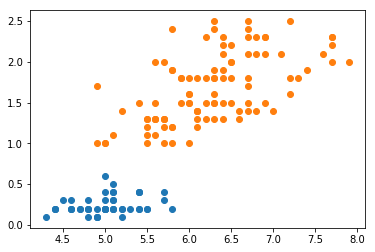

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

In [4]:
def sigmoid(t):
    return (1/(1 + np.exp(-t)))

def LogisticRegression(X_train, y_train, X_test, alpha = 0.1):
    W = np.random.random(X_train.shape[1]+1)
    X = np.concatenate((np.ones(X_train.shape[0]).reshape([-1, 1]), X_train), axis = 1)
#     print(X)
    for i in range(1000):
        y_ = sigmoid(np.matmul(X, W))
        grad = np.matmul(X.T, (np.subtract(y_, y_train)))
#         print(i, W)
        W = W - (alpha * grad)
    print(W)
    
    y_pred = sigmoid(np.matmul(np.concatenate((np.ones(X_test.shape[0]).reshape([-1, 1]), X_test), axis = 1), W))
    y_pred = y_pred>=0.5
    
    return W, y_pred
    
    

In [5]:
W, y_pred = LogisticRegression(X_train, y_train, X_test, alpha = 0.01)

[-1.68511268 -1.17592655 11.07318214]


In [6]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


[-0.73514487 -0.7602885   6.54638805]


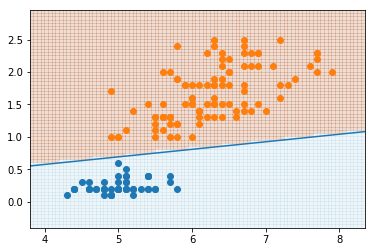

In [7]:
x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
W, Z = LogisticRegression(X, y, np.c_[xx.ravel(), yy.ravel()], alpha = 0.001)

# Put the result into a color plot
Z = Z.reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])


x1 = np.linspace(3.8, 8.35, 500)
x2 = -( W[1]*x1 + W[0])/W[2]
plt.plot(x1, x2)

1.0


/home/gowtham/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


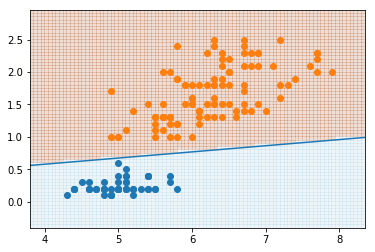

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# # Put the result into a color plot
Z = Z.reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])

x1 = np.linspace(3.8, 8.35, 500)
x2 = -( clf.coef_[0][0]*x1 + clf.intercept_[0])/clf.coef_[0][1]
plt.plot(x1, x2)

# Neural Networks

In [64]:
import autograd.numpy as np

# def cost(weights):
#     a = clf.forward(weights)
#     y_ = np.array(a[-1][-1])[:, 1:].flatten()
#     print(0.5 * np.average((y_ - y)**2))
#     return 0.5 * np.average((y_ - y)**2)


class ANN:
    
    def __init__(self, X, y, layers, activations, cost, alpha = 0.01):
        self.X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
        self.y = y
        self.layers = layers
        self.activations = activations
        self.cost = cost
        self.alpha = alpha
        self.weights = []
        self.weights = [np.array([np.random.random(len(self.X[0])) for i in range(self.layers[0])])]

        
        for i in range(1, len(self.layers)):
            self.weights.append([])
            for j in range(self.layers[i]):
                self.weights[-1].append(np.random.random(self.layers[i-1] + 1))

        self.weights = np.array(self.weights)
        print(self.weights)
    def sigmoid(self, t):
        return (1/(1 + np.exp(-t)))
    
    def softmax(self, t):
        return np.exp(t) / float(sum(np.exp(t)))
    
    def ReLU(self, t):
        return t*(t>0)
    
    def linear(self, t):
        return t
        
    def forward(self):
        actives = {'sigmoid':self.sigmoid, 'softmax':self.softmax, 'ReLU':self.ReLU, 'linear':self.linear}
        a = [np.array(self.X)]
        for i in range(len(self.layers)):
            a.append([])
            temp = [np.ones(len(X))]
            
            for j in range(self.layers[i]):
                Z = np.matmul(np.array(a[-2]), np.array(self.weights[i][j]))
                Z_ = actives[self.activations[i]](np.array(Z).flatten())
                temp.append(Z_)
            a[-1].append(np.array(temp).T)
        return (np.array(a))
        
    def gradients(self):
        a = self.forward()
#         print(a)
        gradient = []
        for i in range(1, len(self.layers)):
            gradient.append([])
#             for j in range(self.layers[i]):
#                 gradient[-1].append(a[i-1]*(-self.y/a[i] + (1-self.y)/1-a[i])) 
                    
    
    
    def backward(self):       
# #         for iterations in range(100):            
#             for k in range(100):
# #                 for i in range(len(self.layers)):
# #                     for j in range(self.layers[i]):
#                 print(grad(cost)(self.weights))
#                 self.weights[0][0] = self.weights[0][0] - self.alpha*grad(cost)(self.weights)
        
        
        
            return self.weights

In [65]:
clf = ANN(X, y, [3,3,1], ['sigmoid', 'sigmoid', 'ReLU'], 'rmse')
c = clf.gradients()

[array([[0.36764006, 0.06900108, 0.47179579],
       [0.82675119, 0.90799684, 0.48128467],
       [0.67220307, 0.15900206, 0.19867569]])
 array([[0.58269318, 0.55991832, 0.67896567, 0.53748983],
       [0.55956775, 0.44014874, 0.6208845 , 0.01899739],
       [0.35882545, 0.12039061, 0.54257531, 0.24355898]])
 array([[0.63379339, 0.23269603, 0.21113689, 0.21829084]])]


In [48]:
import autograd.numpy as np

def cost(weights):
    a = forward(weights)
    y_ = np.array(a[-1][-1])[:, 1:].flatten()
    print(0.5 * np.average((y_ - y)**2))
    return 0.5 * np.average((y_ - y)**2)

def forward(weights):
    actives = {'sigmoid':clf.sigmoid, 'softmax':clf.softmax, 'ReLU':clf.ReLU, 'linear':clf.linear}
    a = [np.array(clf.X)]
    for i in range(len(clf.layers)):
        a.append([])
        temp = [np.ones(len(clf.X))]

        for j in range(clf.layers[i]):
            Z = np.matmul(np.array(a[-2]), np.array(weights[i][j]))
            Z_ = actives[clf.activations[i]](np.array(Z).flatten())
            temp.append(Z_)
        a[-1].append(np.array(temp).T)
    return (np.array(a))


class ANN:
    
    def __init__(self, X, y, layers, activations, cost, alpha = 0.01):
        self.X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
        self.y = y
        self.layers = layers
        self.activations = activations
        self.cost = cost
        self.alpha = alpha
        self.weights = []
        self.weights = [np.array([np.random.random(len(self.X[0])) for i in range(self.layers[0])])]

        
        for i in range(1, len(self.layers)):
            self.weights.append([])
            for j in range(self.layers[i]):
                self.weights[-1].append(np.random.random(self.layers[i-1] + 1))

        self.weights = np.array(self.weights)
        print(self.weights)
    def sigmoid(self, t):
        return (1/(1 + np.exp(-t)))
    
    def softmax(self, t):
        return np.exp(t) / float(sum(np.exp(t)))
    
    def ReLU(self, t):
        return t*(t>0)
    
    def linear(self, t):
        return t
        

        

    
    
    def backward(self):       
#         for iterations in range(100):            
            for k in range(100):
#                 for i in range(len(self.layers)):
#                     for j in range(self.layers[i]):
                print(grad(cost)(self.weights))
                self.weights[0][0] = self.weights[0][0] - self.alpha*grad(cost)(self.weights)
        
        
        
            return self.weights

In [49]:
clf = ANN(X, y, [3,3,1], ['sigmoid', 'sigmoid', 'ReLU'], 'rmse')
c = clf.backward()

[array([[0.01637504, 0.37620462, 0.39292735],
       [0.47871164, 0.54928613, 0.77065635],
       [0.98922294, 0.16043041, 0.18580766]])
 array([[0.2860475 , 0.34565965, 0.11520521, 0.65607115],
       [0.64831911, 0.1538075 , 0.00561409, 0.43561101],
       [0.79732676, 0.30011461, 0.40509153, 0.96212441]])
 array([[0.55836951, 0.72319757, 0.06733047, 0.8349962 ]])]


KeyError: <function primitive.<locals>.f_wrapped at 0x7f70d0f8f6a8>

In [67]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/home/gowtham/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/gowtham/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
X = mnist.data
y = mnist.target

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.35)